# Assignment 0 (Divya Patel)

# Introduction

* This assigment's purpose is  to get a grip in using python and try to visualize the given data and from that try to do data preprocessing. Also try to play with data using python.
* I took two datasets from UCI Machine learning repository. One dataset is for regression and other one is for binary clssification with lable given to the data. After reading the data, I try to play with pandas library.
* In machine learning you can easily make algorithm or you can use inbuild library like sklearn to train the data and predict something but in my point of view the most important thing is data pre-processing. Data-preprocessing means transfering raw data into understandable format. In that we can clean the data, transform the data, reduce the data. After data-preprocessing we can make our model more accurate. That's why I did data preprocessing in both of data and for that I use pandas and numpy generally.
* Then normalization is also one of the useful technique to make your model more accurate. Normalization is method of making feature in some fix bound. SO, it is easy to visualize , understand and mostly compare.
* Data visualization is useful to understand how features are behaving and to find correation between them. Also we can find which feature is affecting our prediction and how it is affecting. For visualization I used matplotlib library.


# Regression


## Introduction and Source of Data

* This is a data set of Physicochemical Properties of Protein Tertiary Structure. The data set is taken from CASP 5-9. There are 45730 decoys and size varying from 0 to 21 armstrong. 
* Using regression on this data, we can estimate size of the residue protine uisng 9 feature given in the data.
* Data source is provided by Prashant Singh Rana, psrana '@' gmail.com, ABV - Indian Institute of Information Technology & Management, Gwalior, MP, India.
* You can get data from http://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure this link.

## Attribute Data

RMSD-Size of the residue. 
1. F1 - Total surface area. 
2. F2 - Non polar exposed area. 
3. F3 - Fractional area of exposed non polar residue. 
4. F4 - Fractional area of exposed non polar part of residue. 
5. F5 - Molecular mass weighted exposed area. 
6. F6 - Average deviation from standard exposed area of residue. 
7. F7 - Euclidian distance. 
8. F8 - Secondary structure penalty. 
9. F9 - Spacial Distribution constraints (N,K Value).

## Read Regression Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
redf = pd.read_csv('CASP.csv')
redf.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


## Data Preprocessing

Finding missing and null value

In [3]:
np.any(redf.isnull())


False

In [4]:
np.any(redf.isna())

False

In [5]:
redf.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


Every feature has very differet bound values than each other. So, it is better to do normalization. I am going to use min-max normalization here and make every feature between 0 to 1.

In [6]:
rendf = (redf.loc[:,redf.columns!= 'RMSD']- redf.loc[:,redf.columns!= 'RMSD'].min())/((redf.loc[:,redf.columns!= 'RMSD'].max()) - redf.loc[:,redf.columns!= 'RMSD'].min())
rendf.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,0.296637,0.261720,0.463818,0.423008,0.301464,0.323758,0.040471,0.291429,0.294518
1,0.100946,0.081810,0.349616,0.119996,0.093926,0.097508,0.031420,0.111429,0.581909
2,0.141698,0.088727,0.269853,0.158712,0.146755,0.087955,0.028137,0.082857,0.588525
3,0.160257,0.131787,0.388734,0.160226,0.172921,0.136765,0.030659,0.200000,0.594843
4,0.134655,0.089442,0.289165,0.117274,0.136153,0.110432,0.026564,0.117143,0.616045


In [7]:
redf = pd.concat([rendf,redf.loc[:,'RMSD']],axis = 1)
redf.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,RMSD
0,0.296637,0.261720,0.463818,0.423008,0.301464,0.323758,0.040471,0.291429,0.294518,17.284
1,0.100946,0.081810,0.349616,0.119996,0.093926,0.097508,0.031420,0.111429,0.581909,6.021
2,0.141698,0.088727,0.269853,0.158712,0.146755,0.087955,0.028137,0.082857,0.588525,9.275
3,0.160257,0.131787,0.388734,0.160226,0.172921,0.136765,0.030659,0.200000,0.594843,15.851
4,0.134655,0.089442,0.289165,0.117274,0.136153,0.110432,0.026564,0.117143,0.616045,7.962


## Visualization Of Regression Data


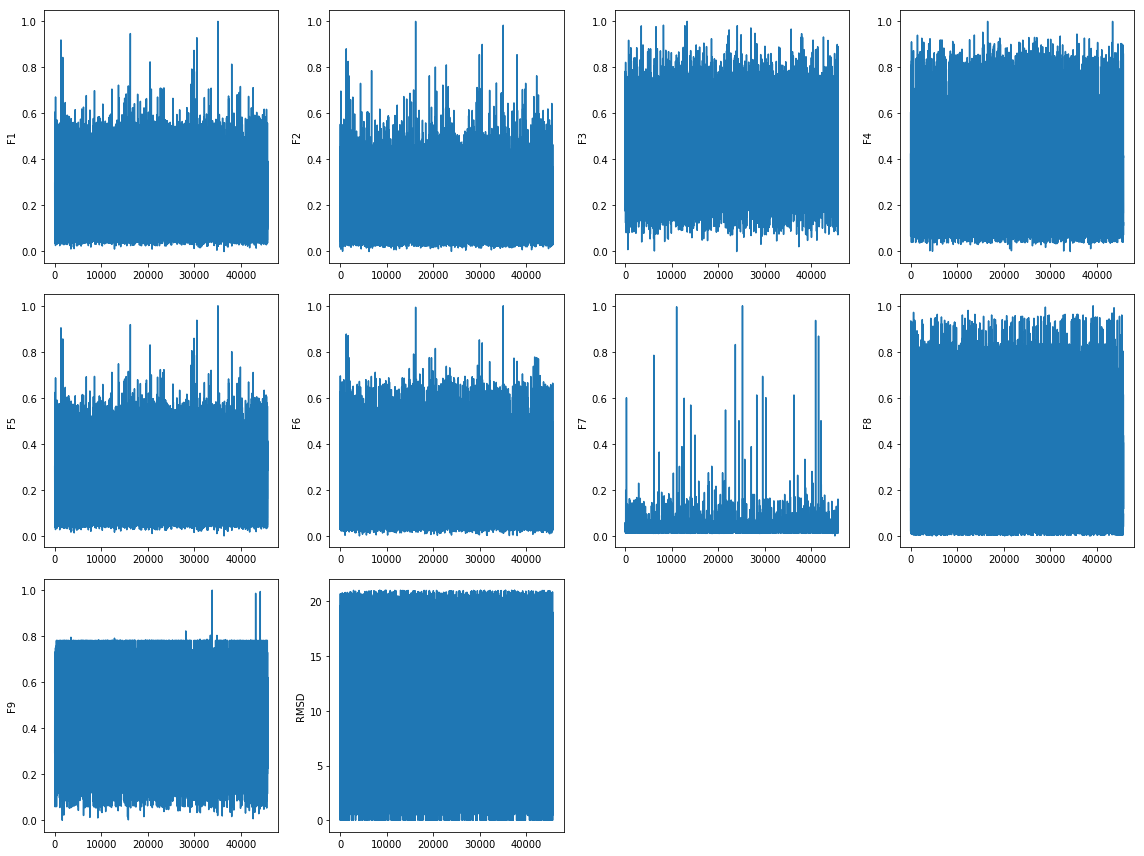

In [8]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.plot(redf.iloc[:, i])
    plt.ylabel(redf.columns.values[i])
fig.tight_layout()
#visualization of every column one by one

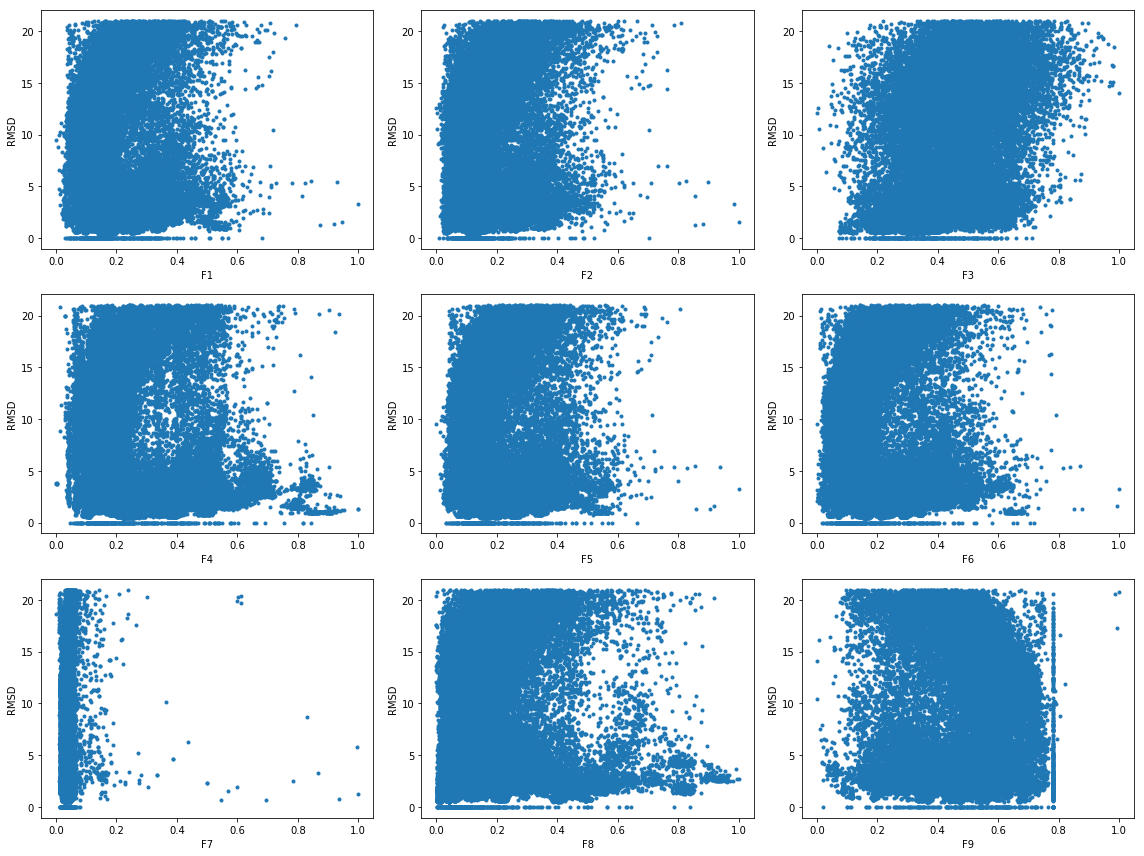

In [9]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(redf.iloc[:, i], redf.loc[:,'RMSD'], '.')
    plt.xlabel(redf.columns.values[i])
    plt.ylabel('RMSD')
fig.tight_layout()

In [10]:
log_redf = pd.concat([-np.log(redf.loc[:,redf.columns!= 'RMSD']),redf.loc[:,'RMSD']],axis = 1) 
log_redf.head()
# taking log to every column except RMSD column

c:\users\divya\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,F1,F2,F3,F4,F5,F6,F7,F8,F9,RMSD
0,1.215247,1.340481,0.768262,0.860363,1.199104,1.127760,3.207160,1.232960,1.222414,17.284
1,2.293166,2.503359,1.050921,2.120299,2.365246,2.327824,3.460305,2.194372,0.541440,6.021
2,1.954055,2.422196,1.309878,1.840666,1.918992,2.430932,3.570678,2.490637,0.530136,9.275
3,1.830977,2.026567,0.944859,1.831167,1.754918,1.989494,3.484843,1.609438,0.519457,15.851
4,2.005041,2.414169,1.240758,2.143242,1.993979,2.203353,3.628194,2.144361,0.484436,7.962


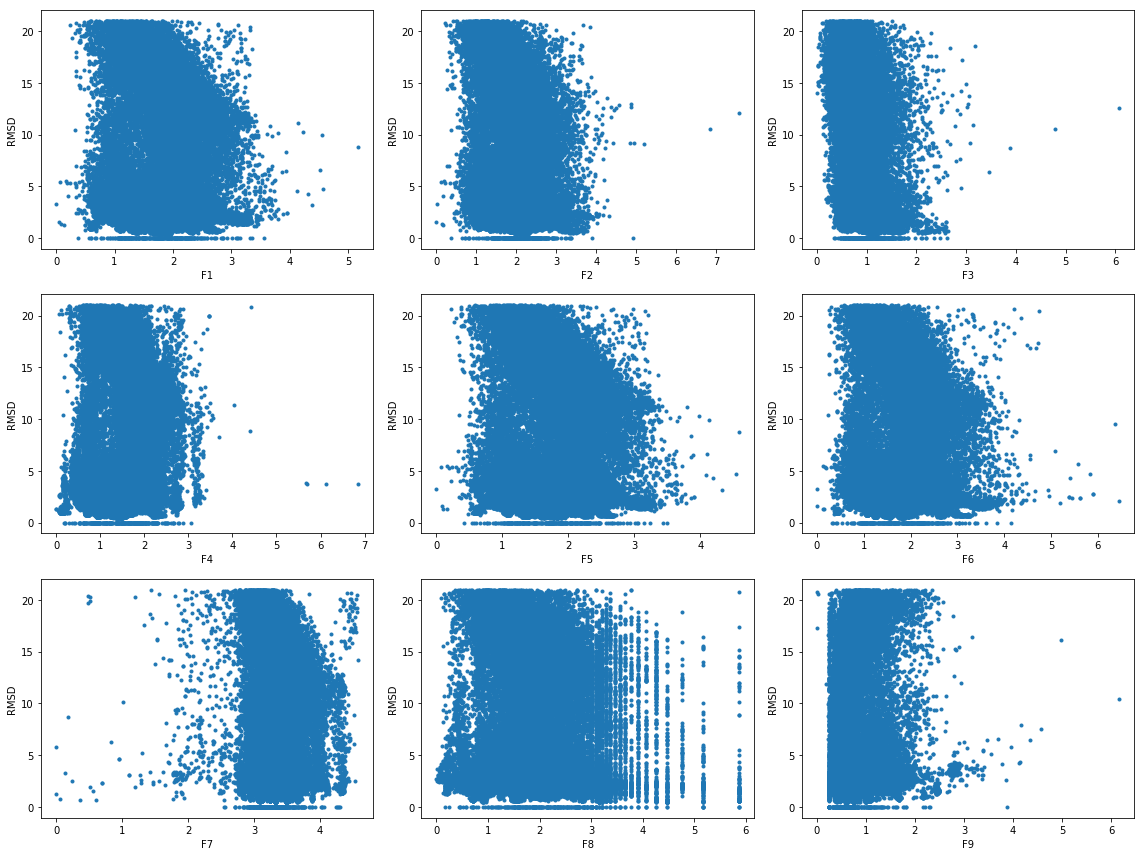

In [11]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(log_redf.iloc[:, i], log_redf.loc[:,'RMSD'], '.')
    plt.xlabel(log_redf.columns.values[i])
    plt.ylabel('RMSD')
fig.tight_layout()

From above graph we can say that there are some less dense area which we can describe as outliers. Like for eaxample in graph between f4 vs RMSD, there are some points around RMSD = 5 which are far away from dense area,

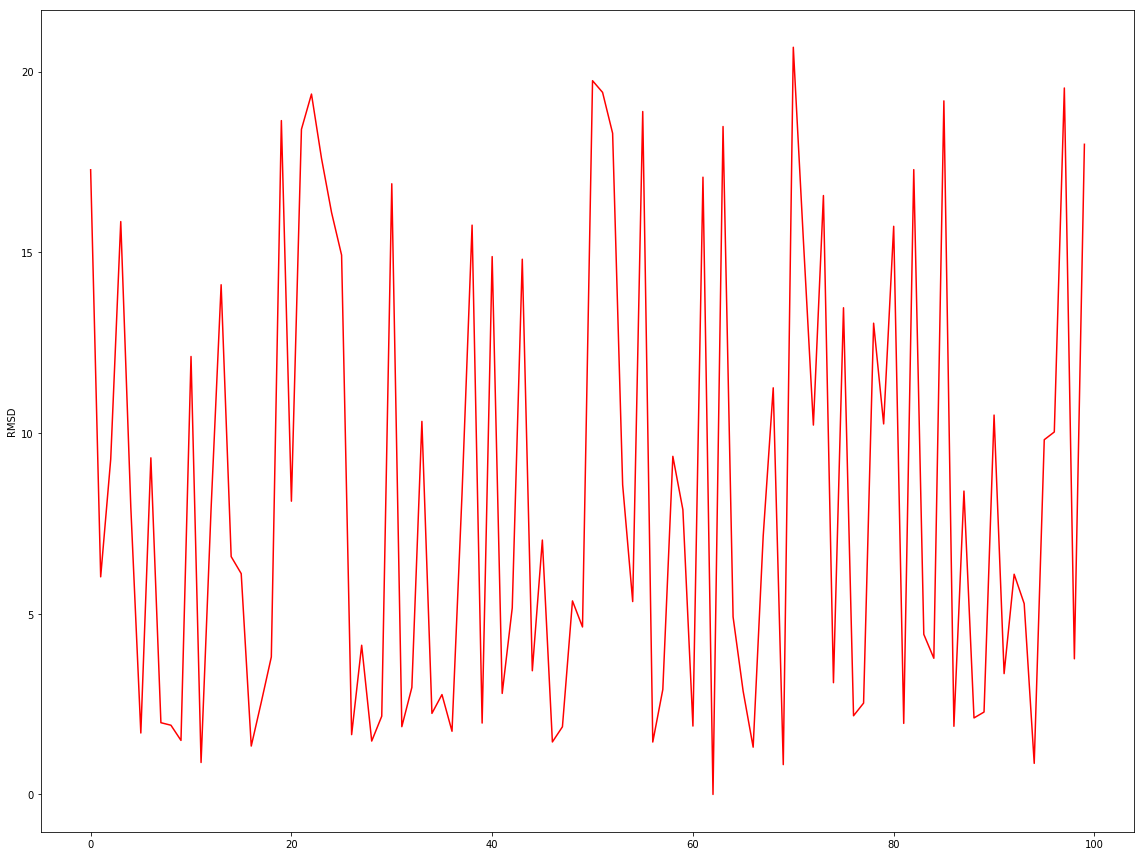

In [12]:
fig = plt.figure(figsize=(16,12))
plt.plot(range(100),redf['RMSD'].iloc[:100],'r')
plt.ylabel('RMSD')
fig.tight_layout() 
# first 100 points visualization

Data is continuous but with lots of variation.

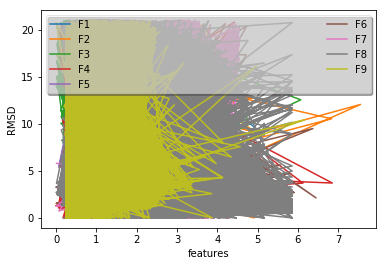

In [13]:
for i in range(9):
    plt.plot(log_redf.iloc[:,i], log_redf.loc[:,'RMSD'], label= list(redf)[i])
    plt.xlabel('features')
    plt.ylabel('RMSD')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
                           

plt.show()

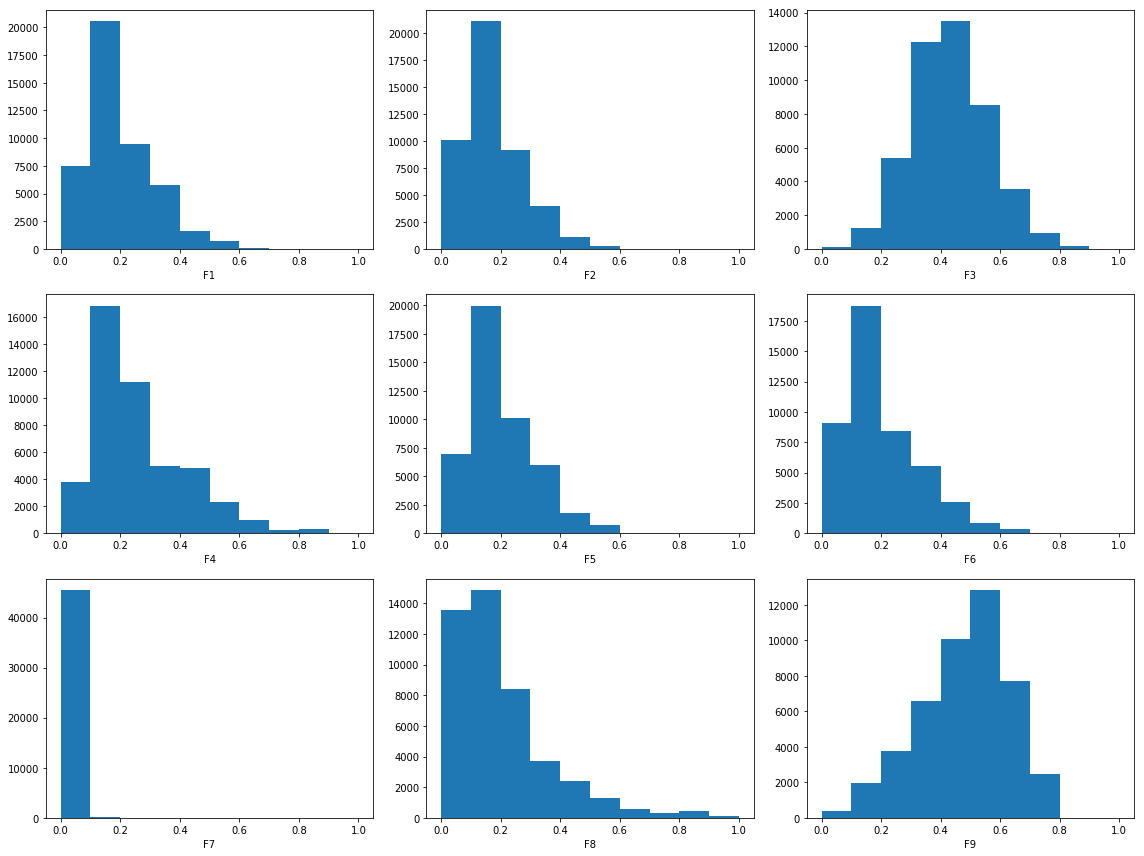

In [14]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.hist(redf.iloc[:,i], 10)
    plt.xlabel(redf.columns.values[i])
    
fig.tight_layout()
# distribusion of data per feature.

## Preliminary observation

* Data is clean and without repetition. Data does not have missing value or null value.
* There is not much to preprocess but data's featues are scattered and each features lies in different bounds. So, it is better to normalize the data. That's why I normalize the data between 0 to 1 but after plotting the data, It was very hard to understand because data points are very near to each other. I took log to resolve that problem.
*

# Classification

## Introduction and Source Of Data

* I get data from https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope this link. This data has magic telescope reading. Magic telescopes means Major Atmospheric Gamma Imaging Cherenkov Telescopes. The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. 
* The data is size of 19020 instance and with 12 features. One feature has lable class which has two value g and h. Here g means gamma signal and h means hardon background.
* Owner of Data: R. K. Bock . 
  Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC) 
  http://wwwmagic.mppmu.mpg.de 
  rkb '@' mail.cern.ch 

  



## Attribute of Data

1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background) 

## Reading Data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [16]:
df = pd.read_csv('MagicTelescope.csv')
df.head() 
#read csv file in dataframe

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Data Preprocessing

Checking for null or missing value.

In [17]:
np.any(df.isnull())

False

In [18]:
np.any(df.isna())

False

In [19]:
col_name = list(df)
col_name

['ID',
 'fLength:',
 'fWidth:',
 'fSize:',
 'fConc:',
 'fConc1:',
 'fAsym:',
 'fM3Long:',
 'fM3Trans:',
 'fAlpha:',
 'fDist:',
 'class:']

ID field is not important so drop from the dataframe.

In [20]:
df = df.drop(['ID'],axis=1)
df.head() #ID is not useful

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Class g assign to 1 and h assign to 0 to make whole data numeric.

In [21]:
df['class:'] = df['class:'].apply(lambda i :  1 if i=='g' else 0 )
df.head()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [22]:
pd.DataFrame(df).describe()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


* Normalization of data using formula (x-mean)/std .
* We can also use [(x-min)/(max-min)]*[new_max-new_min]

In [23]:
ndf = (df.loc[:,df.columns!= 'class:']-df.loc[:,df.columns!= 'class:'].mean())/df.loc[:,df.columns!= 'class:'].std()
ndf.head()
#Normalization of data

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:
0,-0.577211,-0.336795,-0.381120,0.062758,-0.148919,0.541028,0.224812,-0.405831,0.476803,-1.497826
1,-0.510955,-0.570012,-0.648578,0.820362,1.471737,0.516906,0.260357,-0.490081,-0.815397,0.153121
2,2.568210,6.205695,2.615714,-1.875834,-1.773194,2.044938,-1.478497,-2.182972,1.889174,0.842613
3,-0.694749,-0.687241,-1.029451,1.282035,1.606566,0.532757,-0.333506,-0.355350,-0.658786,-1.031436
4,0.516609,0.476371,0.711138,-0.347497,-0.284652,-0.020200,0.353077,1.036593,-0.881016,2.176369


In [24]:
df = pd.concat([ndf,df.loc[:,'class:']],axis = 1)
df.head()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,-0.577211,-0.336795,-0.381120,0.062758,-0.148919,0.541028,0.224812,-0.405831,0.476803,-1.497826,1
1,-0.510955,-0.570012,-0.648578,0.820362,1.471737,0.516906,0.260357,-0.490081,-0.815397,0.153121,1
2,2.568210,6.205695,2.615714,-1.875834,-1.773194,2.044938,-1.478497,-2.182972,1.889174,0.842613,1
3,-0.694749,-0.687241,-1.029451,1.282035,1.606566,0.532757,-0.333506,-0.355350,-0.658786,-1.031436,1
4,0.516609,0.476371,0.711138,-0.347497,-0.284652,-0.020200,0.353077,1.036593,-0.881016,2.176369,1


## Visualization of Classification Data

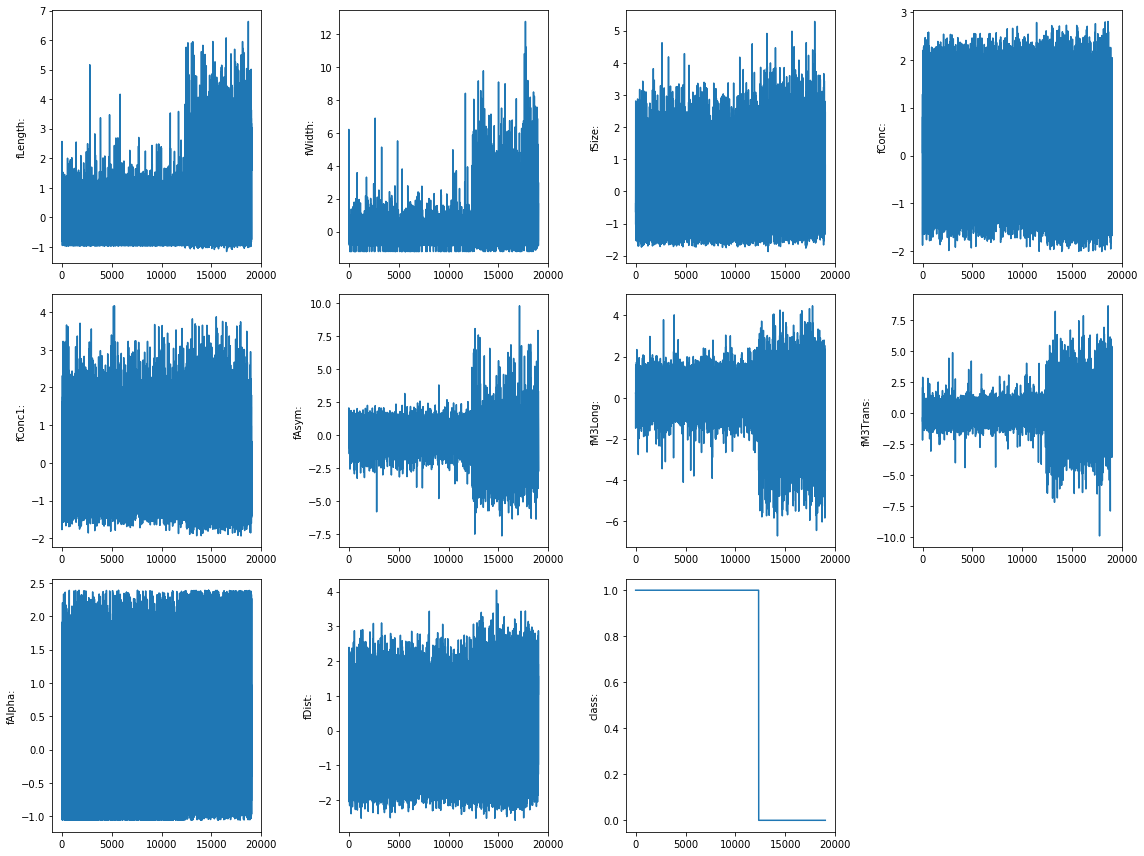

In [25]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(11):
    plt.subplot(3, 4, i+1)
    plt.plot(df.iloc[:, i])
    plt.ylabel(df.columns.values[i])
fig.tight_layout()
#visualization of every column one by one

In [26]:
df.describe()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
count,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,19020.000000
mean,-4.303603e-15,3.753698e-15,7.310147e-15,1.457771e-14,2.879155e-15,5.977226e-18,-1.231309e-15,4.408204e-17,-2.402845e-15,-7.680735e-16,0.648370
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.477492
min,-1.155832e+00,-1.209032e+00,-1.869910e+00,-2.008756e+00,-1.939694e+00,-7.661113e+00,-6.712250e+00,-9.897733e+00,-1.059076e+00,-2.576353e+00,0.000000
25%,-6.825033e-01,-5.623643e-01,-7.361785e-01,-7.905726e-01,-7.798526e-01,-2.745463e-01,-4.585934e-01,-5.329076e-01,-8.465409e-01,-6.867998e-01,0.000000
50%,-3.800899e-01,-2.747766e-01,-1.807389e-01,-1.431903e-01,-1.643019e-01,1.409449e-01,9.350087e-02,1.999641e-02,-3.817940e-01,-2.631513e-02,1.000000
75%,3.982551e-01,1.394582e-01,5.852387e-01,6.748581e-01,6.385608e-01,4.796037e-01,4.959254e-01,5.135869e-01,6.986710e-01,6.255143e-01,1.000000
max,6.631130e+00,1.276574e+01,5.286268e+00,2.804355e+00,4.167401e+00,9.789073e+00,4.466175e+00,8.623301e+00,2.388722e+00,4.037679e+00,1.000000


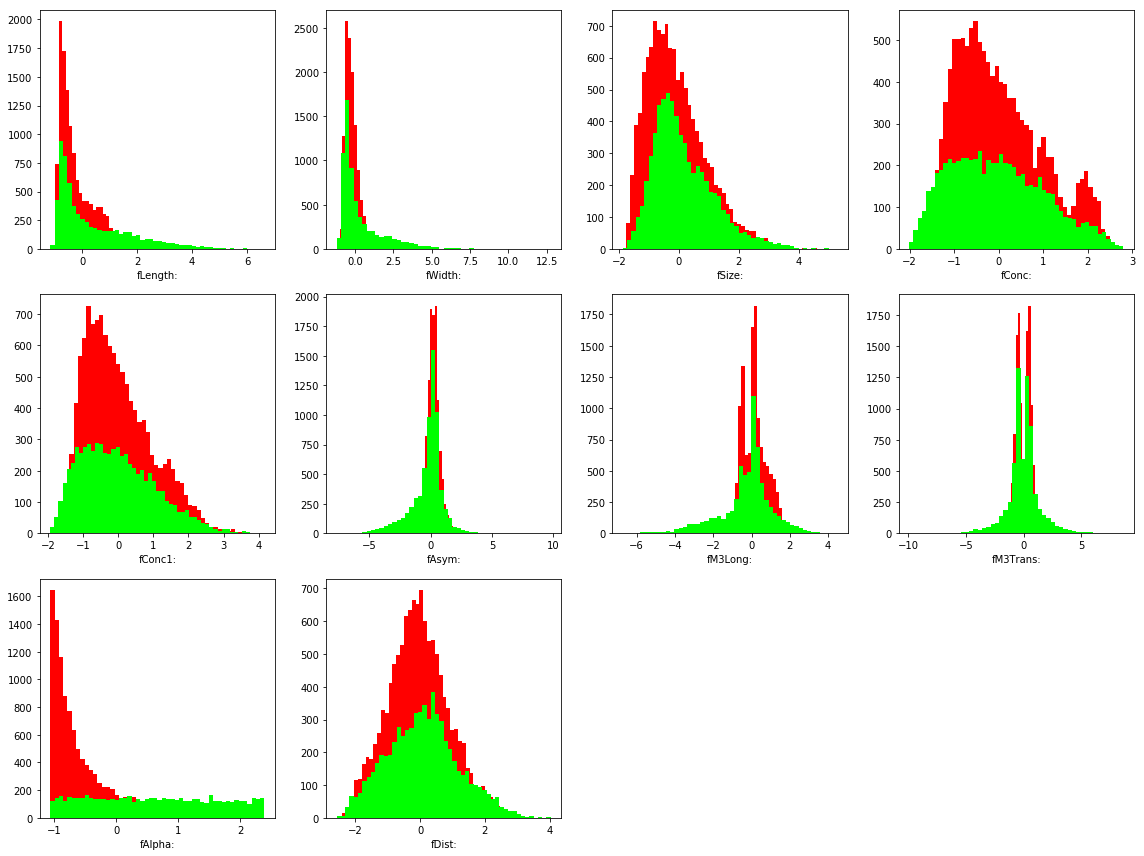

In [27]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.hist(df[df['class:']==1].iloc[:, i], 50,color = 'red')
    plt.hist(df[df['class:']==0].iloc[:, i], 50,color = 'lime')
    plt.xlabel(df.columns.values[i])
fig.tight_layout()
# Stacked bar chart with x axis is features and y axis is count of class


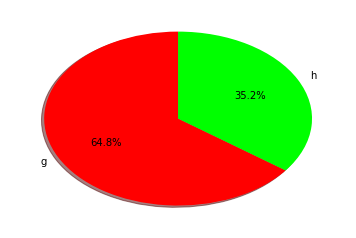

In [28]:
X = [len(df[df['class:']==1]),len(df[df['class:']==0])]
labels = ['g','h']
colors = ['red','lime']     
plt.pie(X, labels= labels, colors=colors , autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()
#Pie chart between g and h class. 

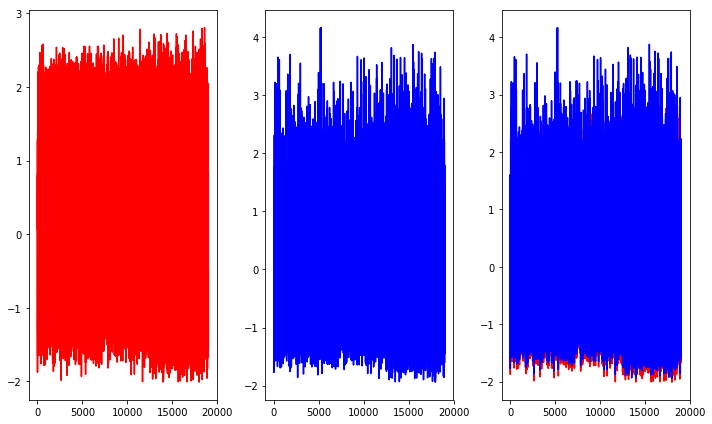

In [29]:
fig = plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.plot(range(df.shape[0]),df['fConc:'],'r')
plt.subplot(1,3,2)
plt.plot(range(df.shape[0]),df['fConc1:'],'b')
plt.subplot(1,3,3)
plt.plot(range(df.shape[0]),df['fConc:'],'r')
plt.plot(range(df.shape[0]),df['fConc1:'],'b')
fig.tight_layout()


In [30]:
df = df.drop(['fConc1:'],axis=1)
df.head()

,fLength:,fWidth:,fSize:,fConc:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,-0.577211,-0.336795,-0.381120,0.062758,0.541028,0.224812,-0.405831,0.476803,-1.497826,1
1,-0.510955,-0.570012,-0.648578,0.820362,0.516906,0.260357,-0.490081,-0.815397,0.153121,1
2,2.568210,6.205695,2.615714,-1.875834,2.044938,-1.478497,-2.182972,1.889174,0.842613,1
3,-0.694749,-0.687241,-1.029451,1.282035,0.532757,-0.333506,-0.355350,-0.658786,-1.031436,1
4,0.516609,0.476371,0.711138,-0.347497,-0.020200,0.353077,1.036593,-0.881016,2.176369,1


## Preliminary observation

* For this data simple classification is not important, since classifying h event as g is worse than classifying g event as h. For comparing different classifier it is better to use ROC curve.
* Data does not have any missing values or null values. Also from the data we can say that ID column is not important , we can just drop that from our dataframe.
* After normalization we may say it is better to visualize now. Conf is calculated using ratio of sum of two highest pixels over fSize and  fConc1 calculated by ratio of highest pixel over fSize. Also there values are pretty symmetrical, we can say from the visualiztion. So, it is not a harm to drop one of the column or drop both column and make a new one which is average of both.


## Conclusion

* I learn some new method of pandas. I also learn to use matplotlib library to make different kind of visualization using same data. 
* It is very important to do data preprocessing in machine learning to get more accurate model. Also it is very important to play with data before you train that data. You should know your data very well before using it. For understanding your data, I think best technique is to visualize the data using different graph. I used histogram , pie chart, stacked bar chart etc graph to visualize this two dataset.
* We can also say that data preprocessing and visualization is as important as choosing the algorithm. 
* We can normalize the data if it is more scattered or we can use log function if data is too near to each other.
* If the size of data is big then most of the time it is beneficial unless it has lot of outliers. 
* Feature selection is also important. I think it is better to select only most important festures then selecting more features. 
* I learn to find outliers in the data using visualization.

## Refrence

* Regression Data:  http://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure 
* Classification data : https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope
* Use  http://wwwmagic.mppmu.mpg.de for understanding the data. 
* Used http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/Data%20Visualization.ipynb for pre-processing idea
* Used https://matplotlib.org/gallery/index.html for ploting different kind of graph
* https://stackoverflow.com